In [0]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

carregar o dataset


In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Exploração dos dados


In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
len(identificacoes_treino)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibir os dados

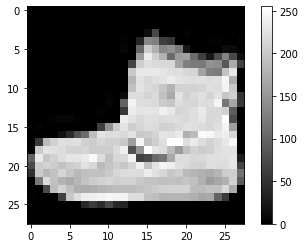

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['camiseta', 'calça', 'pullover', 'vestido', 'casaco',
                          'sandália','camisa', 'tênis','bolsa','bota']                   
'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem], cmap='gray')
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0], cmap='gray')
plt.colorbar()

##Camada 0 // camada de entrada

##Treinamento do Modelo

#Normalizando as imagens

In [0]:
imagens_treino = imagens_treino/float(255)

#Criando, compilando, treinando e normalizando  o modelo

In [105]:
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape = (28,28)), #entrada
  keras.layers.Dense(256, activation=tensorflow.nn.relu), #processamento
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10,activation=tensorflow.nn.softmax) #saida
])

adam = keras.optimizers.Adam(lr = 0.002) # lr-->taxa de aprendizado(Learn Rate)

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                                monitor='val_loss',save_best_only=True)]

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino,identificacoes_treino,
                       batch_size =480,
                       epochs=5, validation_split=0.2, 
                       callbacks=parando_cedo)

Epoch 1/5
100/100 [==============================] - 2s 15ms/step - loss: 0.6384 - accuracy: 0.7753 - val_loss: 0.4439 - val_accuracy: 0.8442
Epoch 2/5
100/100 [==============================] - 1s 15ms/step - loss: 0.4344 - accuracy: 0.8470 - val_loss: 0.3970 - val_accuracy: 0.8547
Epoch 3/5
100/100 [==============================] - 1s 15ms/step - loss: 0.3872 - accuracy: 0.8623 - val_loss: 0.3705 - val_accuracy: 0.8704
Epoch 4/5
100/100 [==============================] - 1s 15ms/step - loss: 0.3579 - accuracy: 0.8724 - val_loss: 0.3535 - val_accuracy: 0.8712
Epoch 5/5
100/100 [==============================] - 1s 14ms/step - loss: 0.3407 - accuracy: 0.8761 - val_loss: 0.3432 - val_accuracy: 0.8767


Sumário do Modelo

In [0]:
sumario_do_modelo = modelo.summary()
#Resumo do modelo

Pesos Da Primeira Camada Dense

In [0]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

In [0]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

In [0]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

In [0]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784,256))
pesos_camada_dense_aleatorios = np.random.rand(784,256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()

In [70]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino,identificacoes_treino, epochs=5, validation_split=0.20)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 20.4173 - accuracy: 0.4038 - val_loss: 5.6823 - val_accuracy: 0.6049
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 5.0984 - accuracy: 0.5757 - val_loss: 2.4069 - val_accuracy: 0.6168
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 3.0177 - accuracy: 0.6416 - val_loss: 1.8614 - val_accuracy: 0.7023
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.8621 - accuracy: 0.6989 - val_loss: 1.0303 - val_accuracy: 0.7693
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.1361 - accuracy: 0.7471 - val_loss: 0.8823 - val_accuracy: 0.7867


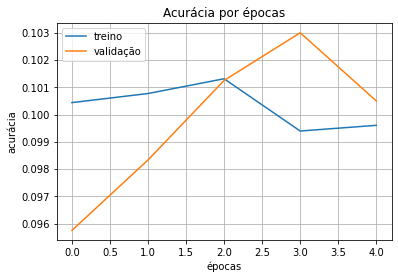

In [81]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])
plt.grid(True)

In [0]:
modelo.get_config()

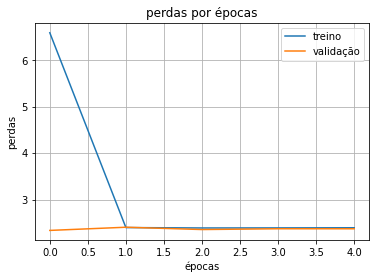

In [82]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perdas')
plt.legend(['treino', 'validação'])
plt.grid(True)

#salvando e carregando o modelo treinado

In [0]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

##Gráfico de acurácia


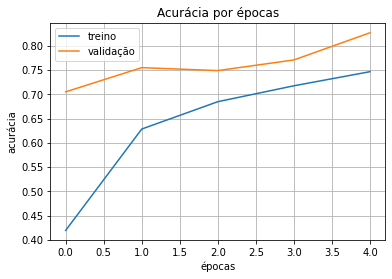

In [16]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])
plt.grid(True)

##Gráfico de perdas

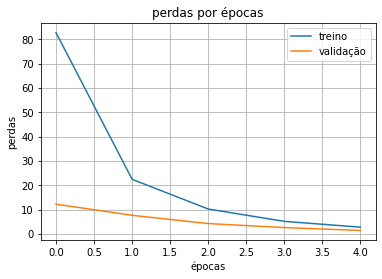

In [17]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perdas')
plt.legend(['treino', 'validação'])
plt.grid(True)

##Validação do modelo (Teste) e o modelo salvo

In [18]:
testes = modelo.predict(imagens_teste)
print('Resultado teste: ',np.argmax(testes[1]))
print('numero da imagem de teste: ', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('numero da imagem de teste: ', identificacoes_teste[1])

Resultado teste:  2
numero da imagem de teste:  2
resultado teste modelo salvo: 2
numero da imagem de teste:  2


##Avaliando o modelo

In [19]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste,identificacoes_teste)
print('perda do teste:',perda_teste)
print('acuracia do teste:',acuracia_teste)

313/313 [==============================] - 0s 2ms/step - loss: 443.3446 - accuracy: 0.7872
perda do teste: 443.3446044921875
acuracia do teste: 0.7871999740600586
